# Lab 5: Filtering in Frequency Domain

### 1. Objectives
This lab focuses on understanding and applying frequency domain filtering techniques for image processing.
You will use grayscale images from Lab 4 to compare the results between spatial and frequency domain processing.

### 2. Submission Guidelines
- File Format: Jupyter Notebook (.ipynb)
- Naming: Lab5_StudentFullName_StudentID.ipynb
- Submission: Compress the Jupyter Notebook file Lab5_StudentFullName_StudentID.zip then upload to Moodle

### 3. Preparation

Install required packages if not installed

In [19]:
# pip install numpy matplotlib opencv-python scikit-image

Then, we load the required libraries and images

In [20]:
# Import the necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
import os

# Load images and convert to grayscale
def load_grayscale_images(image_dir):
    images = {}
    if os.path.exists(image_dir):
        index = 0
        for filename in os.listdir(image_dir):
            filepath = os.path.join(image_dir, filename)
            img_gray = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if img_gray is not None:
                images[index] = img_gray
                index += 1
    return images

# Load road images 
noisy_images = {
    "salt_pepper_noise.png": cv2.imread('salt_pepper_noise.png', cv2.IMREAD_GRAYSCALE),
    "gaussian_noise.png": cv2.imread('gaussian_noise.png', cv2.IMREAD_GRAYSCALE),
    "speckle_noise.png": cv2.imread('speckle_noise.png', cv2.IMREAD_GRAYSCALE)
}

road_images = load_grayscale_images('road_images')

if any(img is None for img in noisy_images.values()) or not road_images:
    print("Error: Could not load one or more images. Please ensure the files and 'road_images' directory are in the correct path.")
else:
    print("All required images loaded successfully.")

All required images loaded successfully.


### A. Fourier Transforms
In this section, students will perform the Discrete Fourier Transform on 3 separate prepared images and analyze the results by breaking down the process into smaller steps.

#### 1. Read and compute DFT and Display the Frequency Spectrum
Use `cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)` to compute the DFT for the three given grayscale images. Then, shift the zero frequency component to the center using `numpy.fft.fftshift` and display the spectrum using a logarithmic scale for easier observation.

**Tasks**:
For each noisy grayscale image:
- Convert the image to float32.
- Compute the 2D Discrete Fourier Transform (DFT) using `cv2.dft`.
- Shift the zero-frequency component to the center using `np.fft.fftshift`.
- Compute the magnitude spectrum using `cv2.magnitude`.
- Apply logarithmic scaling to the magnitude spectrum for better visualization.
- Normalize the magnitude spectrum to the range [0, 255].
- Display the original image and its magnitude spectrum side by side for comparison.

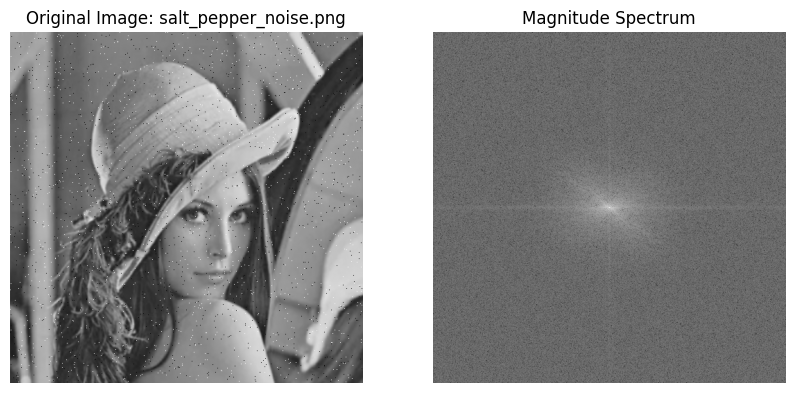

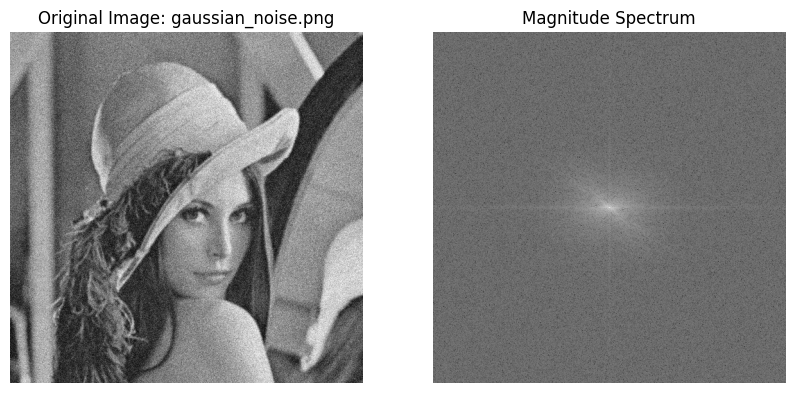

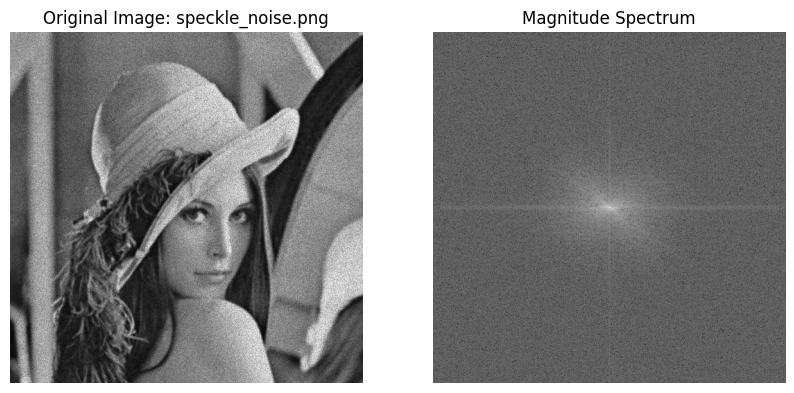

In [21]:
# Task A.1: Compute the DFT and display the frequency spectrum for each noisy image.
dft_images = {}
for name, img in noisy_images.items():
    if img is not None:
        # TODO: Convert the image to float32 then compute the 2D DFT of the image
        img_float = np.float32(img)
        dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)

        # TODO: Shift the zero-frequency component to the center
        fshift = np.fft.fftshift(dft)

        # Store the DFT result
        dft_images[name] = fshift

        # TODO: Compute the magnitude spectrum using cv2.magnitude
        magnitude_spectrum = cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1])
        
        # TODO: Normalize the magnitude spectrum for better visualization
        magnitude_spectrum = np.log1p(magnitude_spectrum)
        magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)
        magnitude_spectrum = np.uint8(magnitude_spectrum)
        
        # Plot the original image and its spectrum
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Original Image: {name}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(magnitude_spectrum, cmap='gray')
        plt.title('Magnitude Spectrum') 
        plt.axis('off')
        plt.show()

#### 2. Inverse Discrete Fourier Transforms (IDFT)

The Inverse Discrete Fourier Transform (IDFT) is used to convert frequency domain data back into the spatial domain, effectively reconstructing the original image from its frequency representation. In this step, we apply the IDFT to the shifted DFT results of each noisy image. After shifting the zero-frequency component back to its original position, the inverse transform is computed and the result is normalized for visualization. 

**Tasks**:
1. For each noisy image, shift the zero-frequency component of its DFT back to the original position using `np.fft.ifftshift`.
2. Compute the inverse DFT using `cv2.idft` to reconstruct the spatial domain image.
3. Normalize the reconstructed image for visualization.
4. Display and compare the original noisy image and its reconstructed version after IDFT.

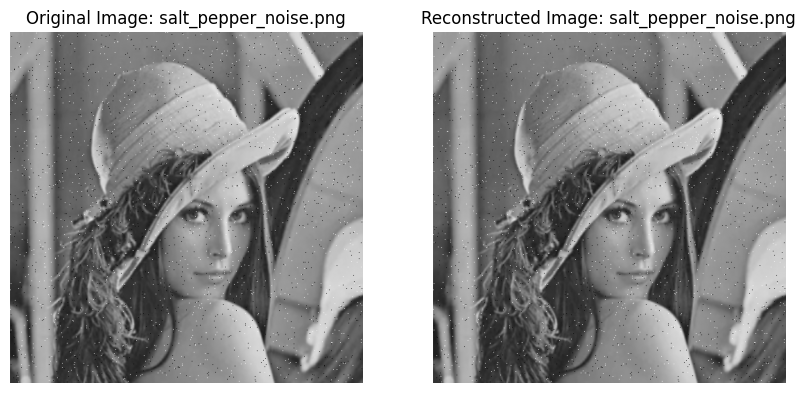

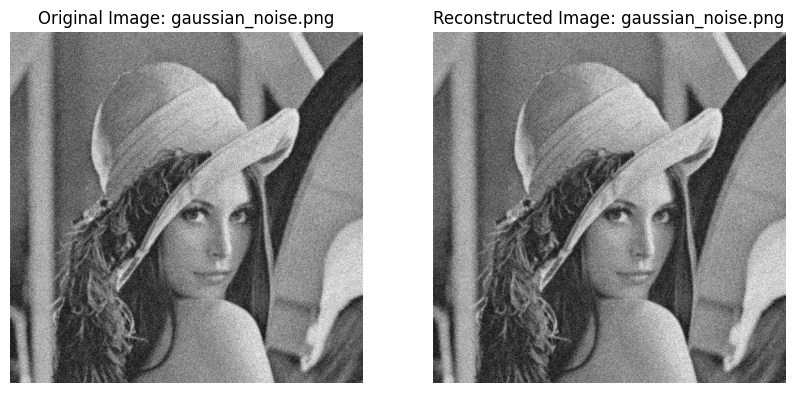

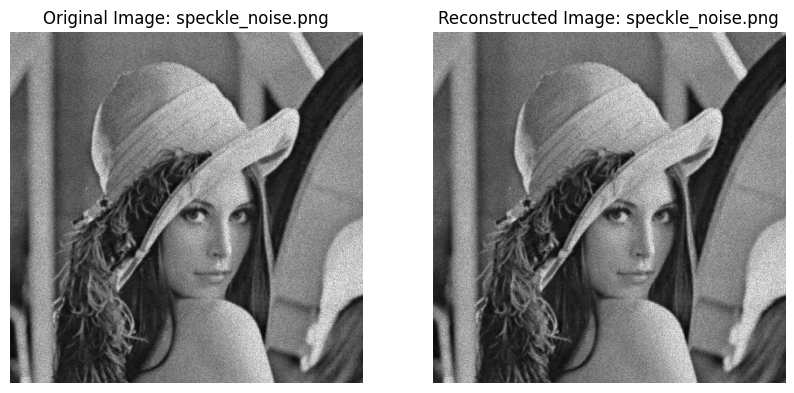

In [22]:
# Task A.2: Perform the IDFT and display the reconstructed images.
reconstructed_images = {}
for name, dft_img in dft_images.items():
    if dft_img is not None:
        # Shift the zero-frequency component back to the original position
        f_ishift = np.fft.ifftshift(dft_img)

        # Compute the Inverse DFT
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
        # Normalize for display
        img_reconstructed = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
        img_reconstructed = np.uint8(img_reconstructed)

        reconstructed_images[name] = img_reconstructed

# Display the reconstructed images
for name, img_back in reconstructed_images.items():
    # Plot the original image and the reconstructed image for comparison
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(noisy_images[name], cmap='gray')
    plt.title(f'Original Image: {name}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_back, cmap='gray')
    plt.title(f'Reconstructed Image: {name}')
    plt.axis('off')
    plt.show()

#### 3. Compute the Error

Calculate the Mean Squared Error (MSE) between the original images and the restored images. 

In [23]:
# Task A.3: Compute the MSE between original and reconstructed images.
for name, img in noisy_images.items():
    if img is not None and name in reconstructed_images and reconstructed_images[name] is not None:
        # TODO: Compute the Mean Squared Error (MSE)
        orig = img.astype(np.float64)
        recon = reconstructed_images[name].astype(np.float64)
        mse = np.mean((orig - recon) ** 2)
        
        print(f'Mean Squared Error for {name}: {mse:.2f}')

Mean Squared Error for salt_pepper_noise.png: 0.91
Mean Squared Error for gaussian_noise.png: 3.27
Mean Squared Error for speckle_noise.png: 155.74


#### B. Smoothing/Blurring Filter (Low-pass Filtering)
A low-pass filter in the frequency domain blurs an image by blocking high frequencies, which correspond to small details and noise.

Low-pass filtering is a technique used to reduce noise and smooth images by attenuating high-frequency components in the frequency domain. High frequencies in an image correspond to rapid intensity changes, such as edges and fine details, while low frequencies represent gradual variations and overall shapes. By applying a low-pass filter, we suppress the high-frequency information, resulting in a blurred or smoothed version of the original image. This process is particularly useful for removing noise and preparing images for further processing tasks. In the frequency domain, different types of low-pass filters—such as ideal, Butterworth, and Gaussian—can be designed to control the degree and characteristics of smoothing.

### 1. Ideal Low-pass Filter
Apply the filter: Create an ideal Low-pass filter (circular) with a cutoff radius of `cutoff_freq`. Apply this filter to the image's frequency spectrum.

**Task**:
- Select a noisy grayscale image (e.g., "salt_pepper_noise.png") from the provided images.
- Create an ideal low-pass filter mask with a specified cutoff frequency.
- Compute the DFT of the selected image and apply the ideal low-pass filter in the frequency domain.
- Visualize the frequency spectrum after filtering.
- Perform the inverse DFT to obtain the filtered (blurred) image.
- Display the original image, the filtered frequency spectrum, and the filtered (blurred) image side by side for comparison.

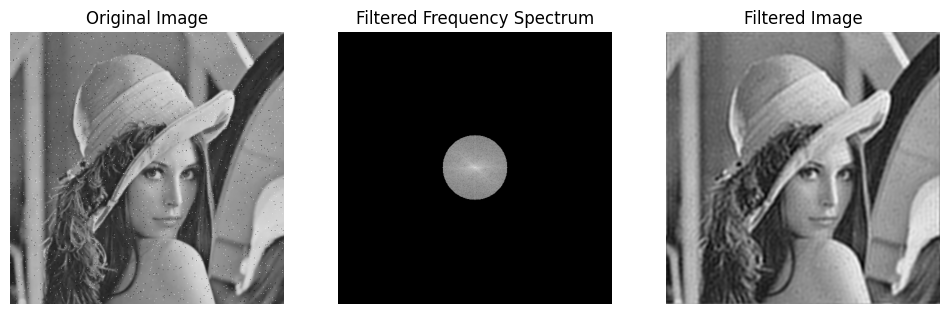

In [24]:
# Task B.1: Implement and apply the Ideal low-pass filter.
selected_image = noisy_images["salt_pepper_noise.png"]

def ideal_lowpass_filter(image, cutoff_freq):
    image = np.float32(image)

    # TODO: Create ideal low-pass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    Y, X = np.ogrid[:rows, :cols]
    dist_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    mask_area = dist_from_center <= cutoff_freq
    mask[mask_area] = 1

    # TODO: Compute the DFT of the image and apply the mask to the DFT of the image
    dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
    fshift = np.fft.fftshift(dft)
    fshift_filtered = fshift * mask

    # TODO: Compute the inverse DFT to get the filtered image
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)

    # Compute the magnitude spectrum for visualization
    magnitude_spectrum = cv2.magnitude(fshift_filtered[:, :, 0], fshift_filtered[:, :, 1])
    magnitude_log = np.log1p(magnitude_spectrum)
    magnitude_normalized = cv2.normalize(magnitude_log, None, 0, 255, cv2.NORM_MINMAX)
    magnitude_spectrum = np.uint8(magnitude_normalized)

    # Display the original, the frequency spectrum after filtering, and the filtered image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Filtered Frequency Spectrum')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img_back, cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')
    plt.show()

if selected_image is not None:
    ideal_lowpass_filter(selected_image, 60)


#### 2. Butterworth Low-pass Filter

Apply the filter: Create a Butterworth Low-pass filter with a cutoff radius of `cutoff_freq` and an `order`.

The Butterworth Low-pass Filter is a frequency domain filter designed to smoothly attenuate high-frequency components while preserving low-frequency information, resulting in a blurred or smoothed image. Unlike the ideal low-pass filter, which has a sharp cutoff, the Butterworth filter provides a gradual transition between passed and blocked frequencies, controlled by its order parameter. A higher order results in a sharper transition, while a lower order yields a smoother roll-off. The filter is defined by its cutoff frequency (`cutoff_freq`) and order (`order`), and its transfer function ensures no abrupt changes, reducing ringing artifacts in the filtered image. This makes the Butterworth filter particularly useful for applications requiring gentle smoothing without introducing significant distortions.

**Tasks**:
- Select a noisy grayscale image (e.g., "salt_pepper_noise.png") from the provided images.
- Create a Butterworth low-pass filter mask with a specified cutoff frequency and order.
- Compute the DFT of the selected image and apply the Butterworth low-pass filter in the frequency domain.
- Visualize the frequency spectrum after filtering.
- Perform the inverse DFT to obtain the filtered (blurred) image.
- Display the original image, the filtered frequency spectrum, and the filtered (blurred) image side by side for comparison.

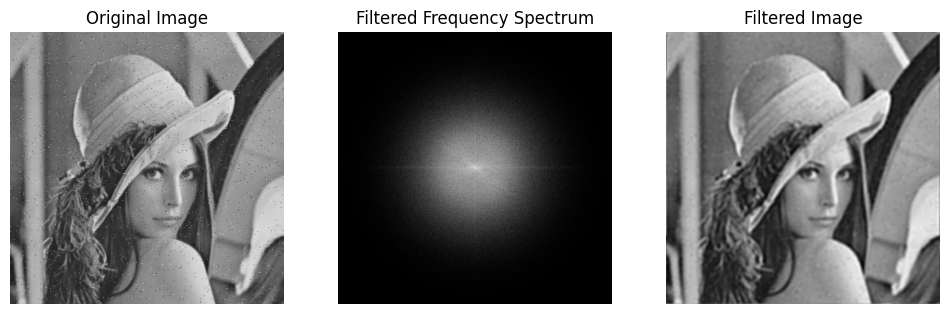

In [25]:
# Task B.2: Implement and apply the Butterworth low-pass filter.
selected_image = noisy_images["salt_pepper_noise.png"]

def butterworth_lowpass_filter(image, cutoff_freq, order):
    image = np.float32(image)

    # TODO: Implement the filter to show the results
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    dist_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    butterworth_mask = 1 / (1 + (dist_from_center / cutoff_freq)**(2 * order))
    mask = np.zeros((rows, cols, 2), np.float32)
    mask[:, :, 0] = butterworth_mask
    mask[:, :, 1] = butterworth_mask

    dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
    fshift = np.fft.fftshift(dft)
    fshift_filtered = fshift * mask

    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)

    # Compute the magnitude spectrum for visualization
    magnitude_spectrum = cv2.magnitude(fshift_filtered[:, :, 0], fshift_filtered[:, :, 1])
    magnitude_log = np.log1p(magnitude_spectrum)
    magnitude_normalized = cv2.normalize(magnitude_log, None, 0, 255, cv2.NORM_MINMAX)
    magnitude_spectrum = np.uint8(magnitude_normalized)

    # Display the original, the frequency spectrum after filtering, and the filtered image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Filtered Frequency Spectrum')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img_back, cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')
    plt.show()

if selected_image is not None:
    butterworth_lowpass_filter(selected_image, 60, 4)


#### 3. Gaussian Low-pass Filter

Apply the filter: Create a Gaussian Low-pass filter with a cutoff radius of `cutoff_freq`.

The Gaussian Low-pass Filter is a frequency domain filter that attenuates high-frequency components of an image using a Gaussian-shaped transfer function. Unlike the ideal or Butterworth filters, the Gaussian filter provides the smoothest transition between passed and blocked frequencies, resulting in minimal ringing artifacts and natural-looking blurring. The filter is defined by its cutoff frequency, which controls the spread of the Gaussian curve: a lower cutoff results in stronger blurring, while a higher cutoff preserves more image detail. Gaussian low-pass filtering is widely used in image processing for noise reduction and pre-processing before edge detection or other analysis tasks.

**Tasks**:
- Select a noisy grayscale image (e.g., "gaussian_noise.png") from the provided images.
- Create a Gaussian low-pass filter mask with a specified cutoff frequency.
- Compute the DFT of the selected image and apply the Gaussian low-pass filter in the frequency domain.
- Visualize the frequency spectrum after filtering.
- Perform the inverse DFT to obtain the filtered (blurred) image.
- Display the original image, the filtered frequency spectrum, and the filtered (blurred) image side by side for comparison.


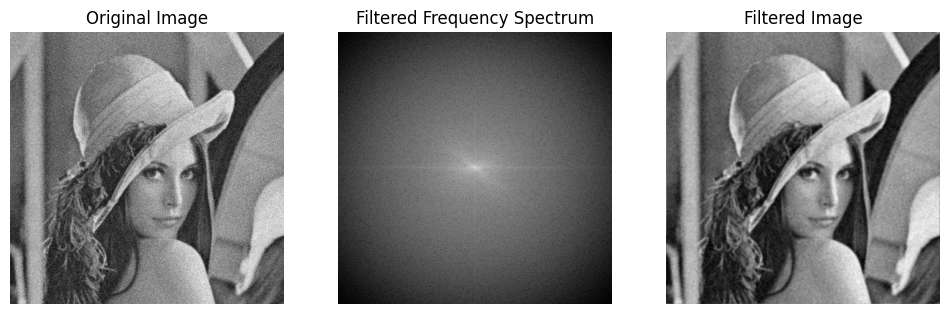

In [26]:
# Task B.3: Implement and apply the Gaussian low-pass filter.
selected_image = noisy_images["gaussian_noise.png"]

def gaussian_lowpass_filter(image, cutoff_freq):
    image = np.float32(image)

    # TODO: Create Gaussian low-pass mask and apply it to the image
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    dist_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    gaussian_mask = np.exp(-(dist_from_center**2) / (2 * (cutoff_freq**2)))
    mask = np.zeros((rows, cols, 2), np.float32)
    mask[:, :, 0] = gaussian_mask
    mask[:, :, 1] = gaussian_mask

    dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
    fshift = np.fft.fftshift(dft)
    fshift_filtered = fshift * mask

    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)

    # Compute the magnitude spectrum for visualization
    magnitude_spectrum = cv2.magnitude(fshift_filtered[:, :, 0], fshift_filtered[:, :, 1])
    magnitude_log = np.log1p(magnitude_spectrum)
    magnitude_normalized = cv2.normalize(magnitude_log, None, 0, 255, cv2.NORM_MINMAX)
    magnitude_spectrum = np.uint8(magnitude_normalized)
    
    # Display the original, the frequency spectrum after filtering, and the filtered image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Filtered Frequency Spectrum')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img_back, cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')
    plt.show()

if selected_image is not None:
    gaussian_lowpass_filter(selected_image, 80)

### C. Sharpening Filter (Highboost Filtering)

Using the "road" image directory from the previous lab, students will implement Highboost filtering with a scaling factor of `k=2` on each of the low-pass filters and save the boosted results.

Highboost filtering is a sharpening technique that enhances the high-frequency components of an image, making edges and fine details more prominent. The process involves first applying a low-pass filter (such as Ideal, Butterworth, or Gaussian) to obtain a blurred version of the image. The high-frequency details are then extracted by subtracting this blurred image from the original. By adding a scaled version of these details back to the original image (controlled by the scaling factor `k`), highboost filtering produces a sharpened result. This method is particularly useful for highlighting important features in images while suppressing noise and smooth regions. In this section, you will apply highboost filtering using different low-pass filters and observe the effects on the "road" images.


#### 1. Highboost with Ideal Low-pass Filter

- Implementation: Apply the Ideal Low-pass Filter and then perform highboost with a scaling factor of k=2.
- Save the result: Save the sharpened image.

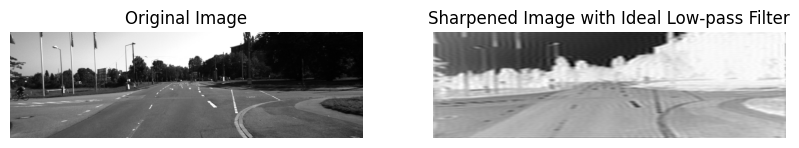

In [27]:
image = road_images[0]  # Use the first road image for sharpening

# Create new folder named 'saved_images' for saving original and filtered images
if not os.path.exists('saved_images'):
    os.makedirs('saved_images')

# Task C.1: Sharpening Filter, Highboost Filtering with Ideal Low-pass Filter
def ideal_highboost(image, cutoff_freq, index=0):
    image = np.float32(image)
    # Create ideal low-pass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    Y, X = np.ogrid[:rows, :cols]
    dist_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    mask_area = dist_from_center <= cutoff_freq
    mask[mask_area] = 1

    # Compute the DFT of the image and shift zero-frequency to center
    dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
    fshift = np.fft.fftshift(dft)

    # Apply the mask
    fshift_filtered = fshift * mask

    # Compute the inverse DFT to get the filtered image
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_blur = cv2.idft(f_ishift)
    img_blur = cv2.magnitude(img_blur[:, :, 0], img_blur[:, :, 1])

    # Highboost filtering with k=2
    k = 2
    sharpened_image = cv2.normalize(image + k * (image - img_blur), None, 0, 255, cv2.NORM_MINMAX)
    sharpened_image = np.uint8(sharpened_image)

    # Display the original and sharpened images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Sharpened Image with Ideal Low-pass Filter')
    plt.axis('off')
    plt.show()

    # Save the original image for reference
    cv2.imwrite(f'./saved_images/original_image_c1_{index}.png', image)

    # Save the sharpened image
    cv2.imwrite(f'./saved_images/sharpened_image_c1_{index}.png', sharpened_image)

if image is not None:
    ideal_highboost(image, 50)  # Adjust cutoff frequency as needed

(optional) Apply the sharpening to the remaining road images

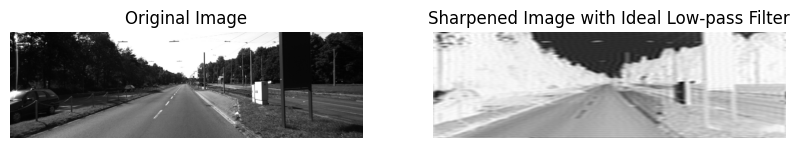

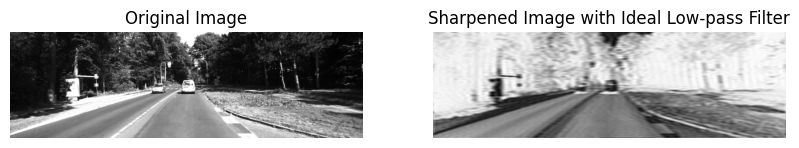

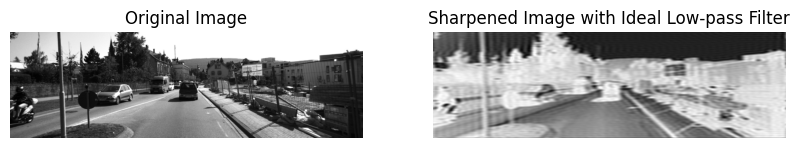

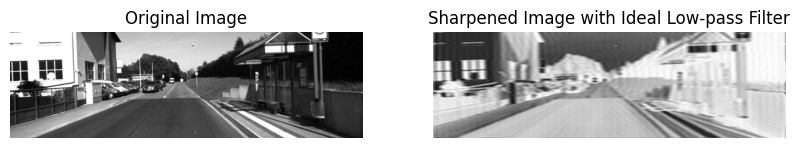

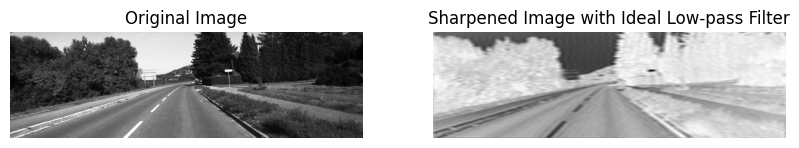

In [28]:
length = len(road_images)  # Check how many road images are available

for index in range(1, length):
    image = road_images[index]  # Use the next road image for sharpening
    ideal_highboost(image, 50, index)  # Adjust cutoff frequency as needed

#### 2. Highboost with Butterworth Low-pass Filter
- Implementation: Apply the Butterworth Low-pass Filter and then perform highboost with a scaling factor of k=2.
- Save the result: Save the sharpened image.

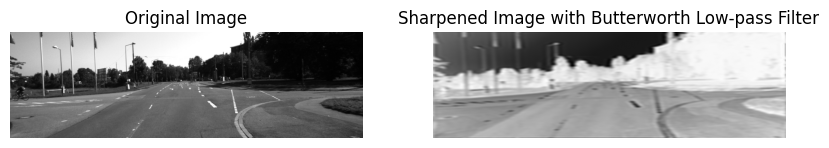

In [29]:
image = road_images[0]  # Use the first road image for sharpening

# Task C.2: Sharpening Filter, Highboost Filtering with Butterworth Low-pass Filter
def butterworth_highboost(image, cutoff_freq, order, index=0):
    image = np.float32(image)

    # Create Butterworth low-pass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    dist_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    butterworth_mask = 1 / (1 + (dist_from_center / cutoff_freq)**(2 * order))
    # Expand mask to 2 channels for complex DFT
    mask = np.zeros((rows, cols, 2), np.float32)
    mask[:, :, 0] = butterworth_mask
    mask[:, :, 1] = butterworth_mask

    # Compute the DFT of the image and shift zero-frequency to center
    dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
    fshift = np.fft.fftshift(dft)

    # Apply the mask
    fshift_filtered = fshift * mask

    # Compute the inverse DFT to get the filtered image
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_blur = cv2.idft(f_ishift)
    img_blur = cv2.magnitude(img_blur[:, :, 0], img_blur[:, :, 1])

    # Highboost filtering with k=2
    k = 2
    sharpened_image = cv2.normalize(image + k * (image - img_blur), None, 0, 255, cv2.NORM_MINMAX)
    sharpened_image = np.uint8(sharpened_image)
    # Display the original and sharpened images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Sharpened Image with Butterworth Low-pass Filter')
    plt.axis('off')
    plt.show()

    # Save the original image for reference
    cv2.imwrite(f'./saved_images/original_image_c2_{index}.png', image)
    # Save the sharpened image
    cv2.imwrite(f'./saved_images/sharpened_image_c2_{index}.png', sharpened_image)

if image is not None:
    butterworth_highboost(image, 50, 4)  # Adjust cutoff frequency and order as needed

(optional) Apply the sharpening to the remaining road images

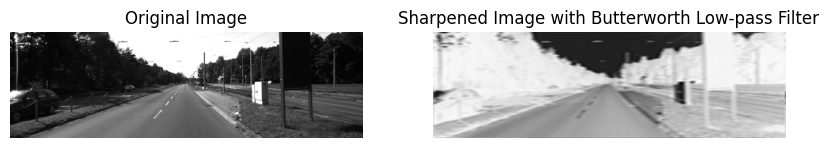

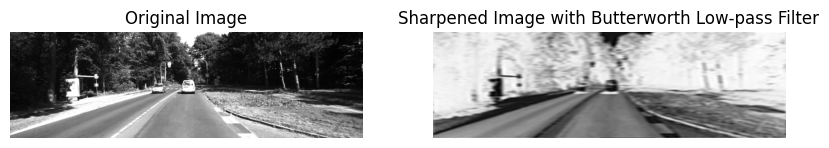

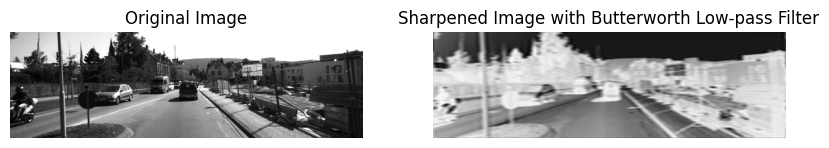

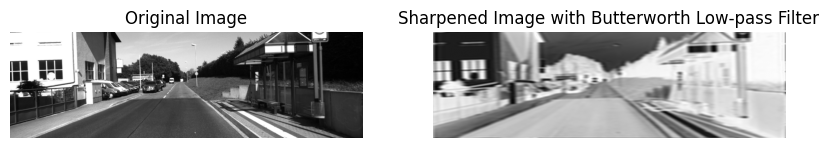

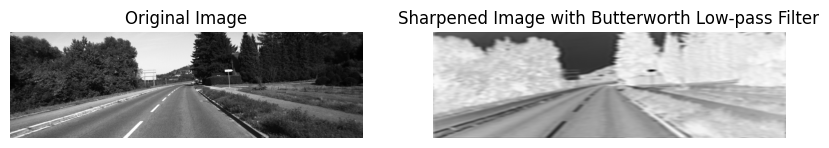

In [30]:
length = len(road_images)  # Check how many road images are available

for index in range(1, length):
    image = road_images[index]  # Use the next road image for sharpening
    butterworth_highboost(image, 50, 4, index)  # Adjust cutoff frequency as needed

#### 3. Highboost with Gaussian Low-pass Filter
- Implementation: Apply the Gaussian Low-pass Filter and then perform highboost with a scaling factor of k=2.
- Save the result: Save the sharpened image.

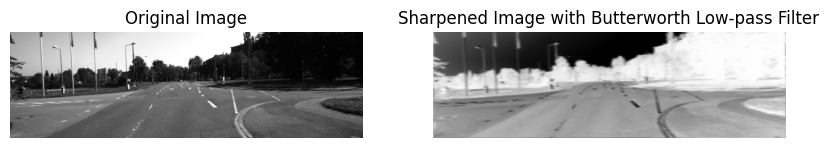

In [31]:
image = road_images[0]  # Use the first road image for sharpening

# Task C.3: Sharpening Filter, Highboost Filtering with Gaussian Low-pass Filter
def gaussian_highboost(image, cutoff_freq, index=0):
    image = np.float32(image)

    # Create Gaussian low-pass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    dist_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    gaussian_mask = np.exp(-(dist_from_center**2) / (2 * (cutoff_freq**2)))
    # Expand mask to 2 channels for complex DFT
    mask = np.zeros((rows, cols, 2), np.float32)
    mask[:, :, 0] = gaussian_mask
    mask[:, :, 1] = gaussian_mask

    # Compute the DFT of the image and shift zero-frequency to center
    dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
    fshift = np.fft.fftshift(dft)

    # Apply the mask
    fshift_filtered = fshift * mask

    # Compute the inverse DFT to get the filtered (blurred) image
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_blur = cv2.idft(f_ishift)
    img_blur = cv2.magnitude(img_blur[:, :, 0], img_blur[:, :, 1])

    # Highboost filtering with k=2
    k = 2
    sharpened_image = cv2.normalize(image + k * (image - img_blur), None, 0, 255, cv2.NORM_MINMAX)
    sharpened_image = np.uint8(sharpened_image)

    # Display the original and sharpened images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Sharpened Image with Butterworth Low-pass Filter')
    plt.axis('off')
    plt.show()

    # Save the original image for reference
    cv2.imwrite(f'./saved_images/original_image_c3_{index}.png', image)
    # Save the sharpened image
    cv2.imwrite(f'./saved_images/sharpened_image_c3_{index}.png', sharpened_image)

if image is not None:
    gaussian_highboost(image, 50)  # Adjust cutoff frequency and order as needed

(optional) Apply the sharpening to the remaining road images

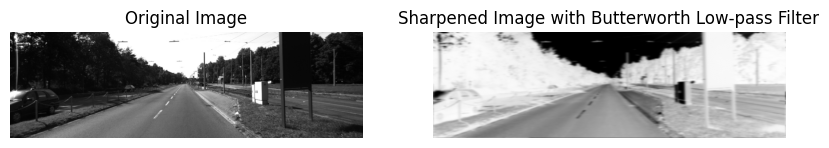

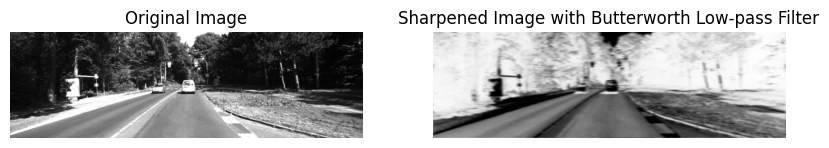

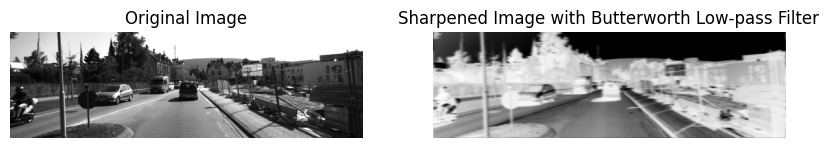

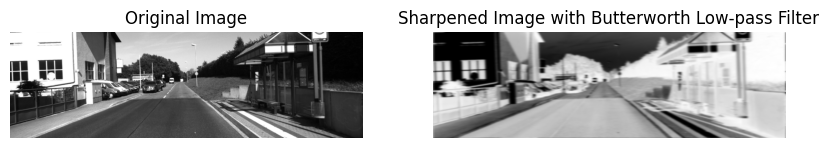

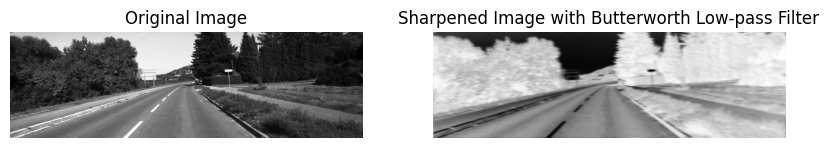

In [32]:
length = len(road_images)  # Check how many road images are available

for index in range(1, length):
    image = road_images[index]  # Use the next road image for sharpening
    gaussian_highboost(image, 50, index)  # Adjust cutoff frequency as needed